# EDA

> Exploratory Data Analysis of extracted sentiments

This notebook takes a deep dive into the sentiments that were extracted from the earnings call audio files by way of visualizations.

## Data Loading

The following code chunks mount the google drive, set the necessary file path, and read in earnings call audio data prior to sentiment extraction.

***This should be altered based on user settings***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
cur_path = "/content/drive/My Drive/earnings-call-audio-modeling/"
os.chdir(cur_path)
!pwd

/content/drive/My Drive/earnings-call-audio-modeling


In [3]:
import pandas as pd
df = pd.read_csv('audio_sentiment.csv')

In [4]:
def max_smoothing(df, window_size):
  df = df.copy()
  df[['ang', 'hap', 'neu', 'sad']] = df[['ang', 'hap', 'neu', 'sad']].rolling(window_size).max()
  return df

In [5]:
def mean_smoothing(df, window_size):
  df = df.copy()
  df[['ang', 'hap', 'neu', 'sad']] = df[['ang', 'hap', 'neu', 'sad']].rolling(window_size).mean()
  return df

## Data Visualization

Below, we initialize a random company and plot the sentiments from its earnings call in Q4 2021.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

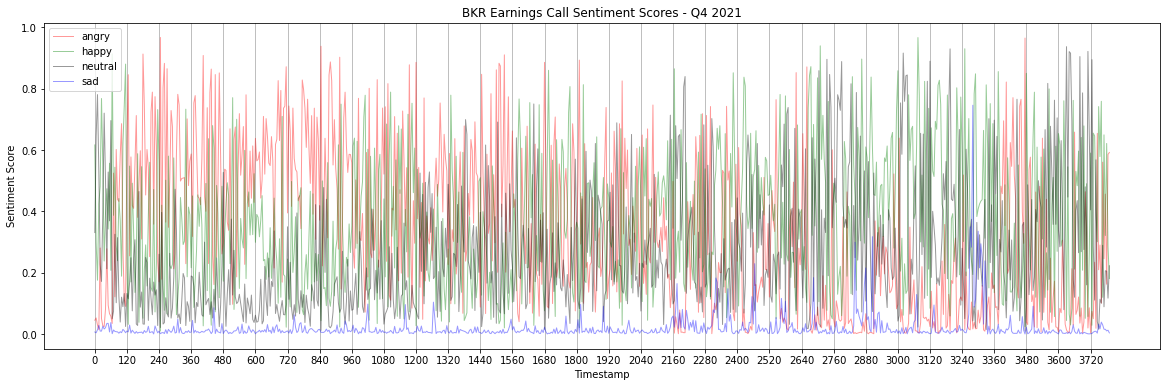

In [7]:
# initialize plot data
company = df.sample()['company'].to_string(index=False)
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

Though we see a pretty noisy plot, clear differentiation between sentiments is displayed no matter which company is analyzed. Next, let's take a look at what might happen if we smooth out the plot. 

In [8]:
window_exp = 9

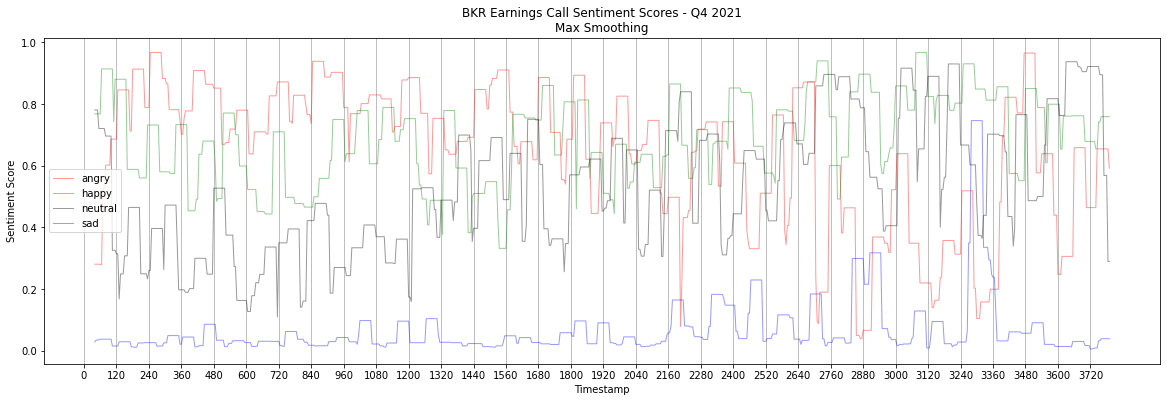

In [9]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

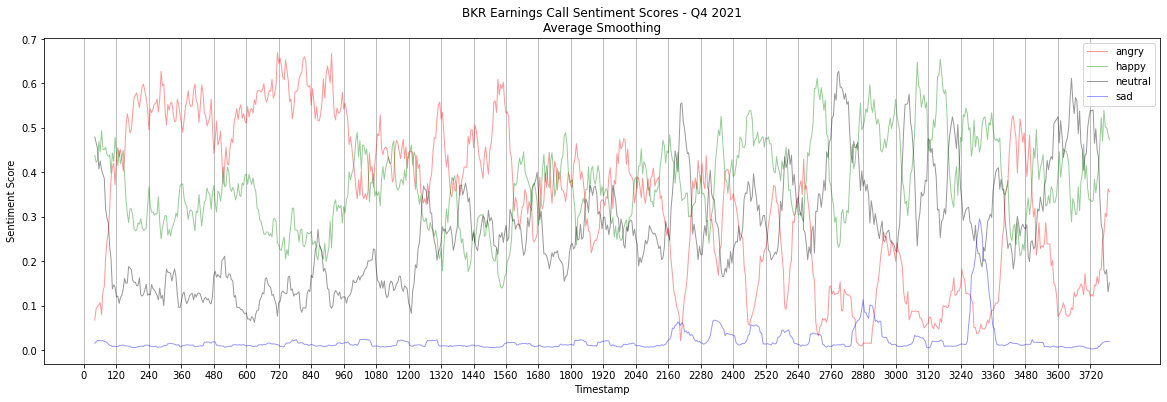

In [10]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

A smoothing window size of 9 seems to strike a good balance of noise reduction in the plot while not having too large of a window size. This takes the current observation and eight observations before it and uses either the average or max function to assign a new value to the current observation. So in terms of raw numbers, a 45 second window is being used to develop the above plots.

The difference between using average and max is one that will influence the appearance of and the assumptions behind the given plot. The max smoothing transformation takes into account the strongest observation to represent a given window, whereas average takes into account all observations. It is for this reason that the average smoother is more susceptible to outliers. This is why we see the average smoothing plot mirror more of the noise from the initial plot. However, both smoothing transformations still help to paint a clearer picture of what is going on in the initial plot.

## Selected examples

### AA

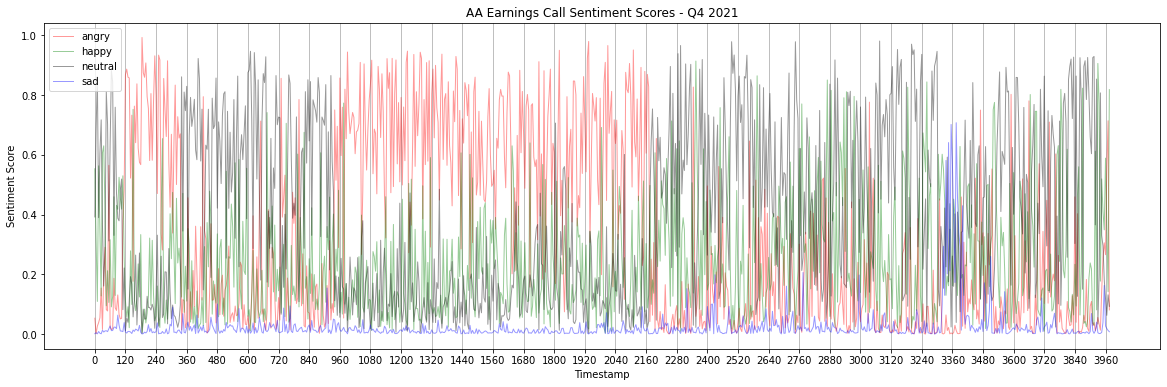

In [11]:
# initialize plot data
company = 'AA'
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

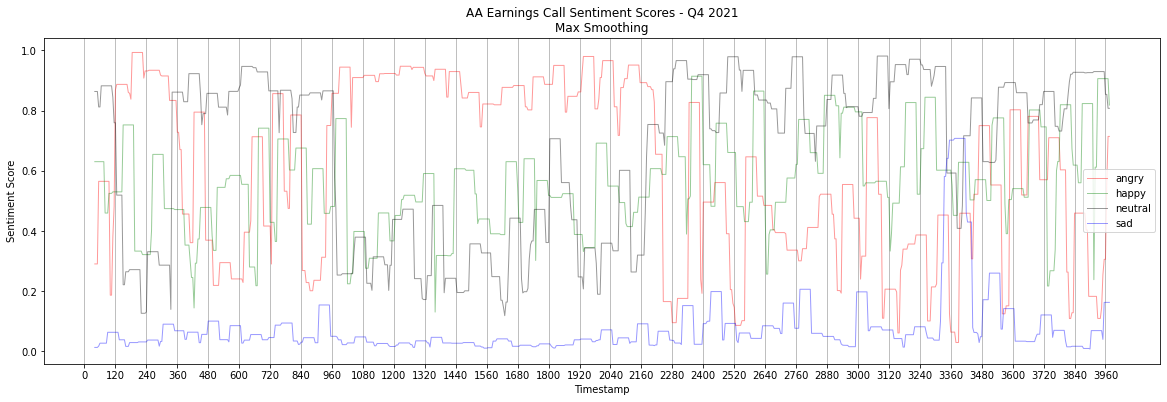

In [12]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

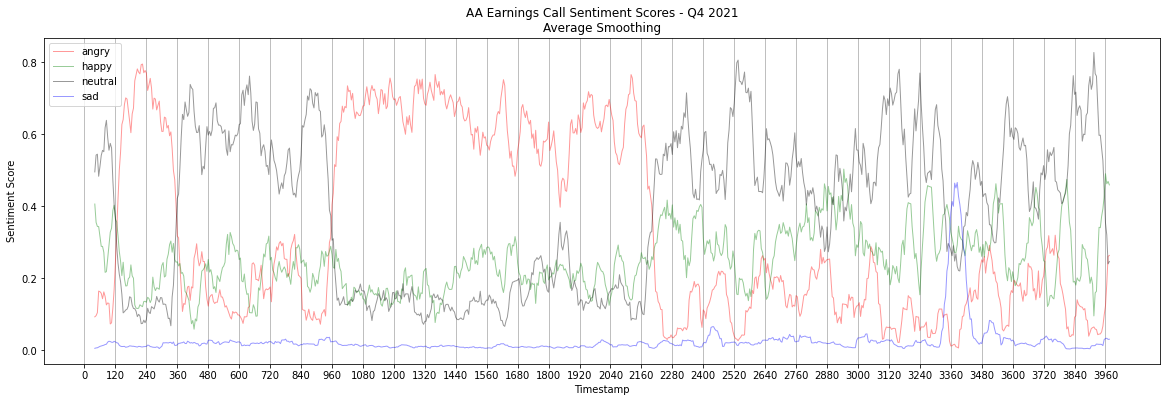

In [13]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

AA: Around 2 minute mark, there is a switch of speakers. The new speaker opens with, "Thank you Jim and thanks to everyone for joining our call." This changes the neutral/happy predictions to anger. Further along in the call, anger changes to neutral upon additional speaker change before 6 minute mark, but back to anger just before 16 minute mark in conjunction with yet another speaker change. It seems at this point as if the transformer is classifying volume/tone rather than content. Additionally a spike in sadness beginning shortly after the 55 minute mark happens when a new speaker is heard asking a question, though the content of the question does not indicate sadness.

### GSBC

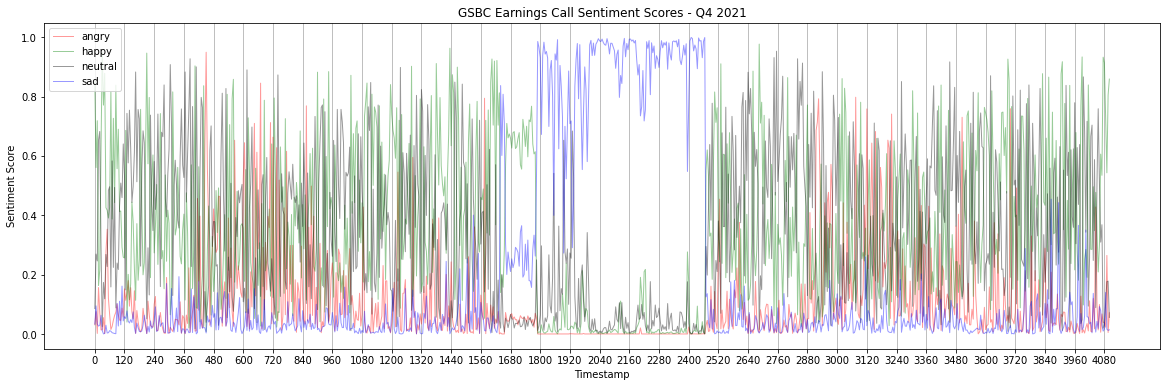

In [16]:
# initialize plot data
company = 'GSBC'
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

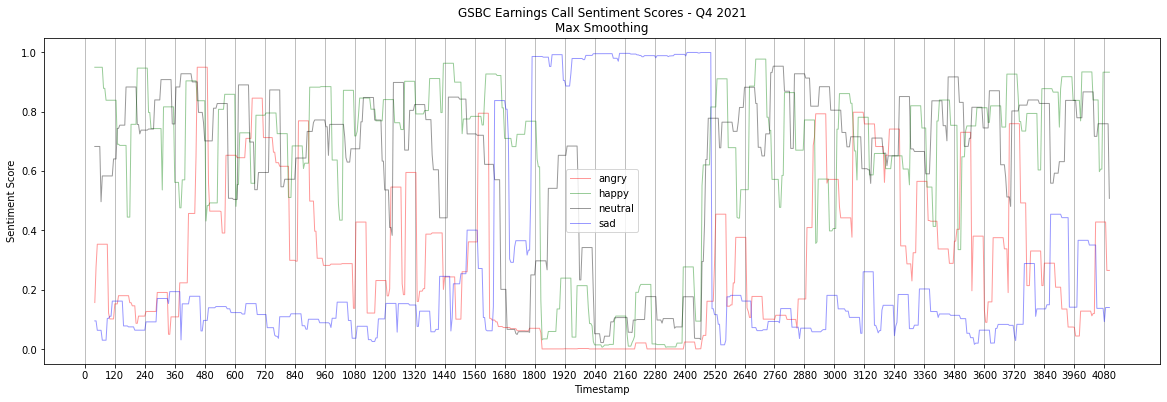

In [17]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

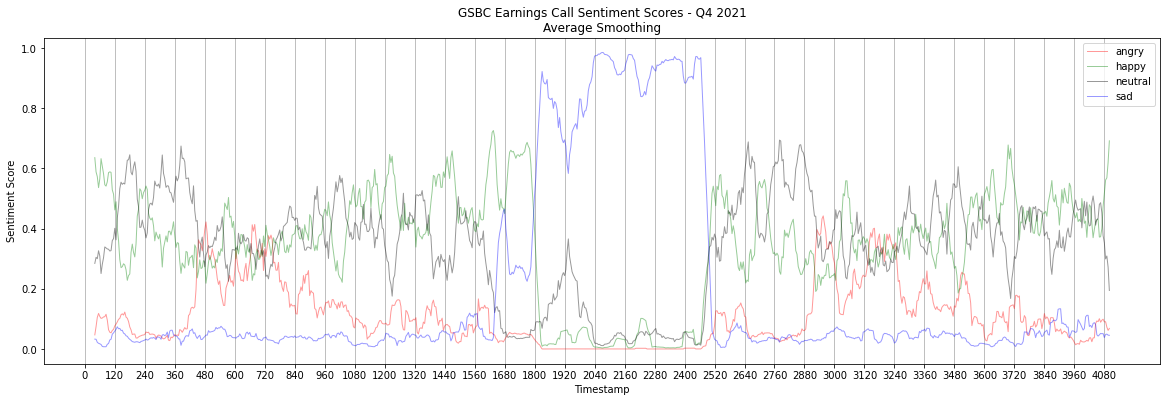

In [18]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

GSBC: Sadness sentiment increases when female voice begins to speak around 27 minutes. There is an 11 minute period from approximately minute 30 to minute 41 which no words are spoken, but music is played. During this period, the sentiment predicted is primarily sadness, with no anger predicted whatsoever. The call then repeats following this period. This anomaly seems to happen in other calls as well (UMPQ is an example).

### KEX

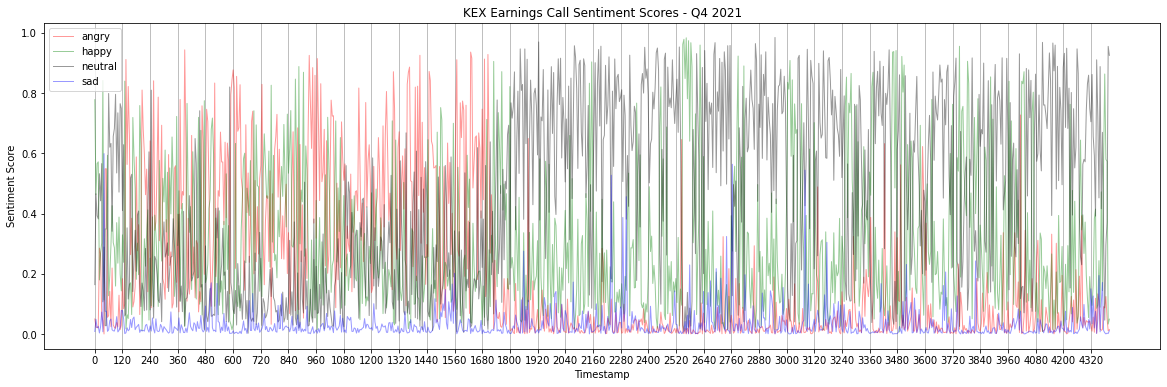

In [19]:
# initialize plot data
company = 'KEX'
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

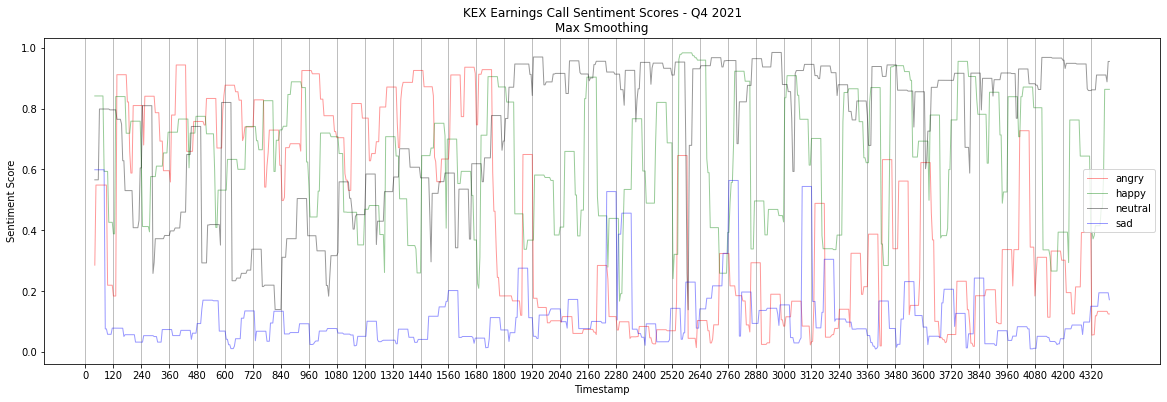

In [20]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

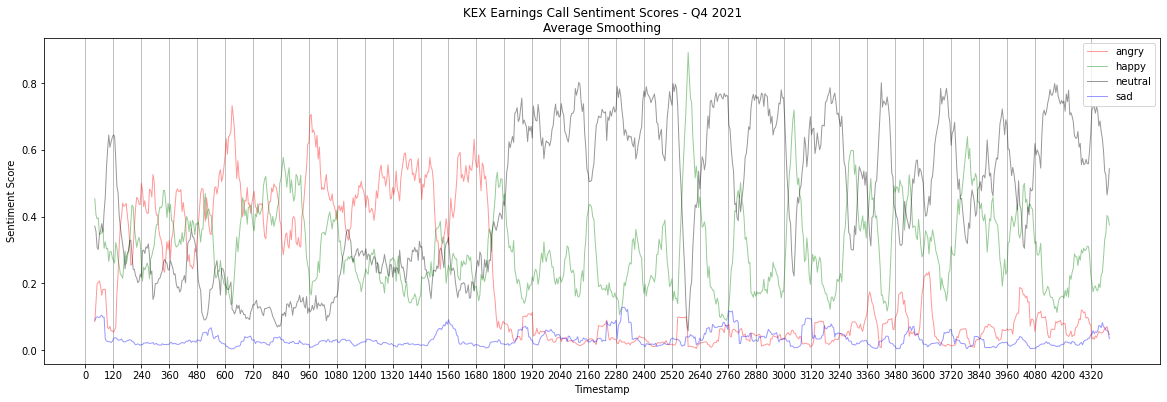

In [21]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

KEX: Around 29 minutes there is a switch from the main speaker to a Q&A session. At the moment that this switch occurs, the sentiment predictions switch from primarily anger to neutral or happiness. 

### WAL

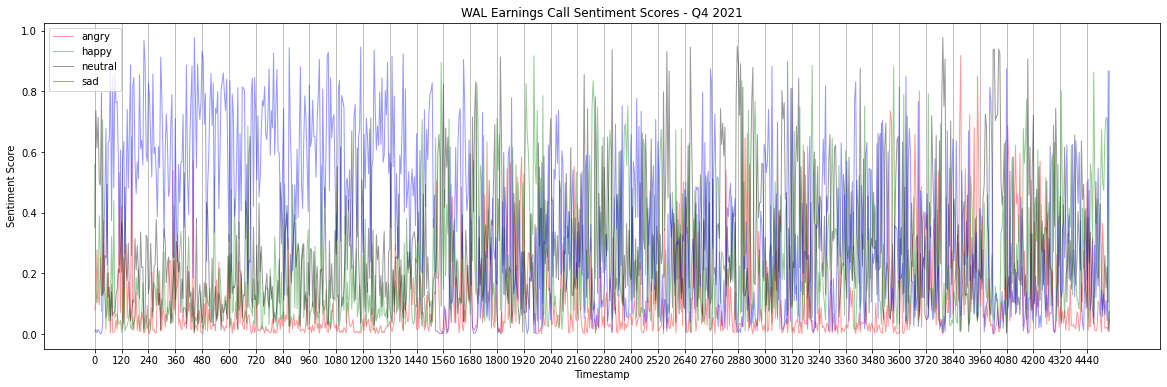

In [22]:
# initialize plot data
company = 'WAL'
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

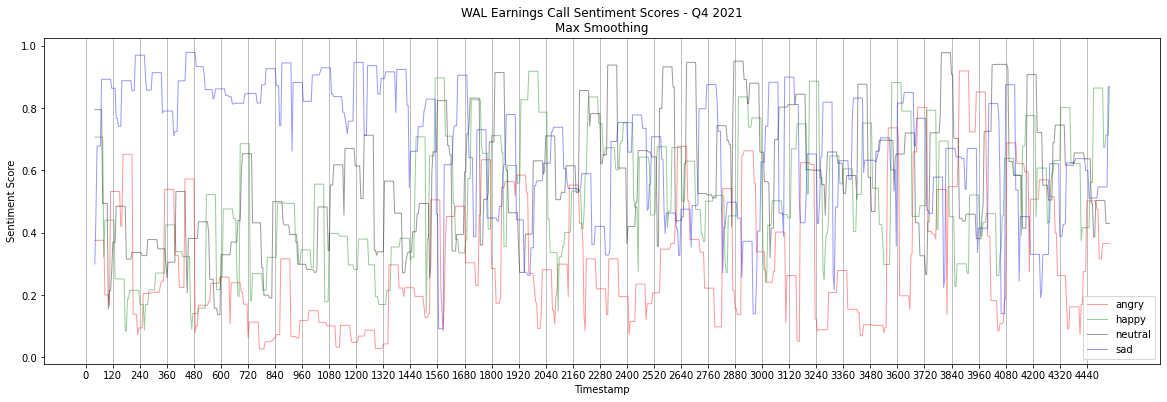

In [23]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

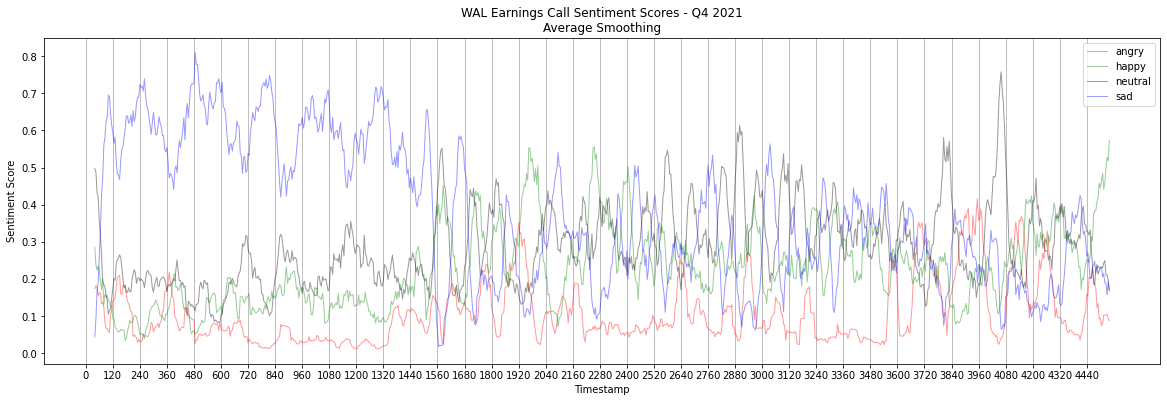

In [24]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

WAL: This audio is quieter than others that were listened to and that is reflected by a primarily sad sentiment prediction throughout the first 25 minutes of the call. When opened up to questions, the sentiment changed to have a greater happiness sentiment.

### ANF

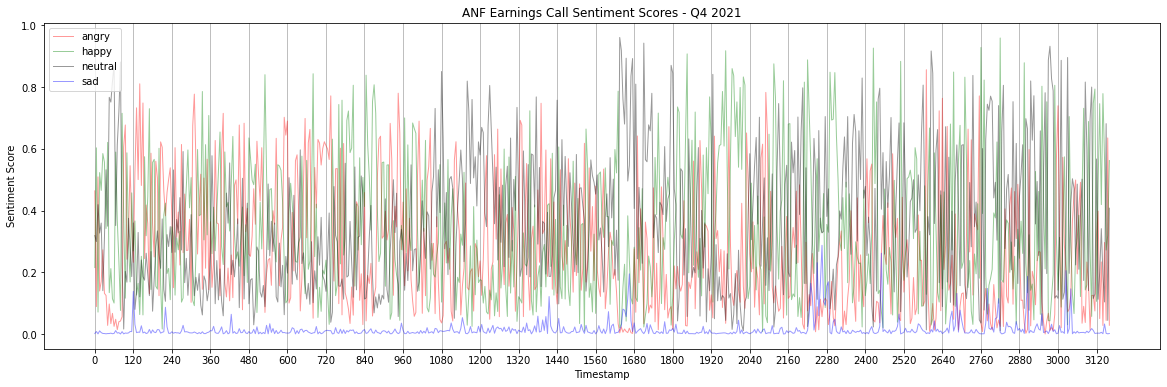

In [25]:
# initialize plot data
company = 'ANF'
plot_data = df[df['company']==company]
timestamp = plot_data['timestamp']
angry = plot_data['ang']
happy = plot_data['hap']
neutral = plot_data['neu']
sad = plot_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

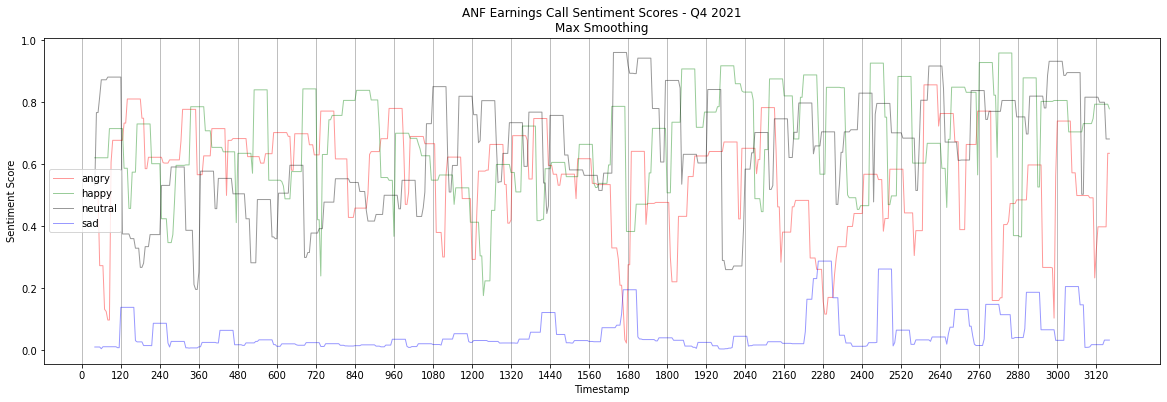

In [26]:
# initialize plot data
smooth_data = max_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nMax Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

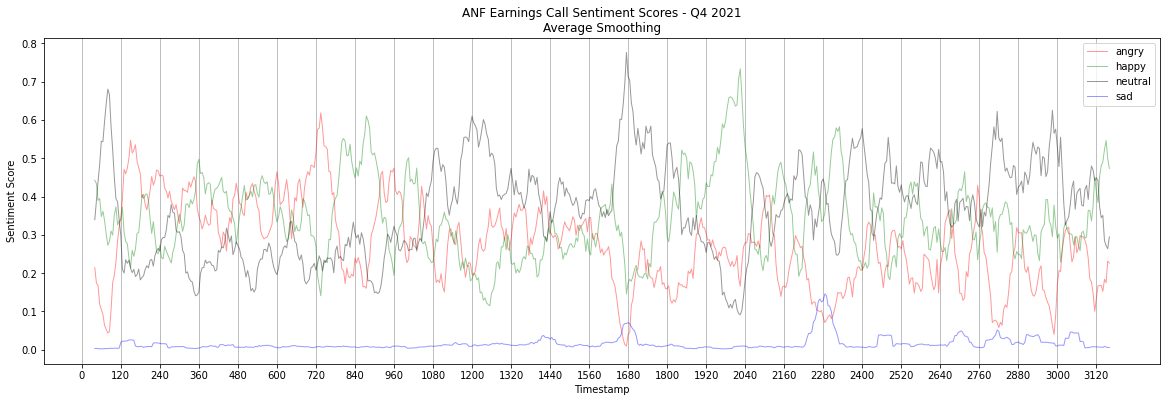

In [27]:
# initialize plot data
smooth_data = mean_smoothing(plot_data, window_exp)
timestamp = smooth_data['timestamp']
angry = smooth_data['ang']
happy = smooth_data['hap']
neutral = smooth_data['neu']
sad = smooth_data['sad']

# plot lines
lw=1
a=0.4
plt.rcParams["figure.figsize"] = (20,6)

plt.plot(timestamp, angry, label = "angry", color='red', linewidth=lw, alpha=a)
plt.plot(timestamp, happy, label = "happy", color='green', linewidth=lw, alpha=a)
plt.plot(timestamp, neutral, label = "neutral", color='black', linewidth=lw, alpha=a)
plt.plot(timestamp, sad, label = "sad", color='blue', linewidth=lw, alpha=a)
plt.title(str(company + ' ' + 'Earnings Call Sentiment Scores - Q4 2021\nAverage Smoothing'))
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.grid(axis = 'x')
plt.xticks(np.arange(min(timestamp), max(timestamp)+1, 120))
plt.legend()
plt.show()

ANF: After minute 27, a question was asked that was rather monotone, this was accompanied by a neutral sentiment prediction. A high-pitched woman's voice is heard just after minute 32 to answer a question. The sentiment here changes to strongly happy.

## Conclusions

From this round of exploratory data analysis, we discovered that there is a clear separation in the sentiments predicted within the earnings call data. With the help of smoothing transformations, some noise is able to be eliminated from the visualizations to paint a clearer picture of changes in sentiments. 

Most importantly, by spot checking some of the sentiment plots for various companies, we identified that the transformer model does not seem to be picking up the content of what is being said very well. Instead the transformer seemingly predicts sentiment based on the tone and volume of sounds captured. These sentiment predictions may be useful combined with sentiment analysis of text data of earnings calls. Currently, it is unclear whether these sentiment predictions will be useful in modeling stock price movement, as the content being discussed is seemingly not useful for predicting sentiment. 

We may have uncovered bias in the transformer model, as male voices seem to be more often classified as angry as opposed to female voices. Further analysis of this would be an interesting expansion of this project.